# Lista 9 (9 pkt.)

In [27]:
import numpy as np
import hashlib
import matplotlib.pyplot as plt
import random

## Zadanie 1 (1 pkt.)

Wczytaj dwa obrazki: 'Campin_Boze_Narodzenie1.png' oraz 'Campin_Boze_Narodzenie2.png' jeden z nich jest zgodny z oryginałem obrazu Roberta Campin a drugi jest lekko zmodyfikowany, rozponaj prawdziwy obraz obliczając jego funkcję skrótu SHA-256 i porównując ją do skrótu podanego poniżej (w postaci szesnastkowej), który odpowiada oryginałowi:

In [2]:
hash_original='2d08246bbb3a8f6b0c16b8d8effd2c783233a6a174496731dfff887bb41bc7e7'

Obrazek wczytaj za pomocą:

In [3]:
file = open('Campin_Boze_Narodzenie1.png','rb')
obraz1=file.read()
file.close()

In [4]:
def calculate_sha256(file_name):
    try:
        with open(file_name, 'rb') as file:
            obraz_bytes = file.read()
        m = hashlib.sha256()
        m.update(obraz_bytes)
        return m.hexdigest()
    except FileNotFoundError:
        return f"Błąd: Plik {file_name} nie znaleziony."

In [5]:
obraz1_hash = calculate_sha256('Campin_Boze_Narodzenie1.png')
obraz2_hash = calculate_sha256('Campin_Boze_Narodzenie2.png')

print(f"Hash obrazu 1: {obraz1_hash}")
print(f"Hash obrazu 2: {obraz2_hash}")
print(f"Oryginalny hash: {hash_original}")

if obraz1_hash == hash_original:
    print("\n'Campin_Boze_Narodzenie1.jpg' jest oryginalnym obrazem.")
elif obraz2_hash == hash_original:
    print("\n'Campin_Boze_Narodzenie2.jpg' jest oryginalnym obrazem.")
else:
    print("\nŻaden z obrazów nie pasuje do oryginalnego skrótu.")

Hash obrazu 1: 2d08246bbb3a8f6b0c16b8d8effd2c783233a6a174496731dfff887bb41bc7e7
Hash obrazu 2: cfd529c79a1fb0c015e6ff6f3015b3175b1281b992888f8f7718fe24f455a27b
Oryginalny hash: 2d08246bbb3a8f6b0c16b8d8effd2c783233a6a174496731dfff887bb41bc7e7

'Campin_Boze_Narodzenie1.jpg' jest oryginalnym obrazem.


'rb' w powyższej funkcji oznacza, że odczytujemy binarną postać obrazu. Podobnie wczytaj drugi obraz. Do policzenia funkcji skrótu użyj biblioteki hashlib: https://docs.python.org/3/library/hashlib.html

## Zadanie 2 (2 pkt.)

Zaimplementuj funkcję **rho_pollard()** znajdującą kolizje w funkcji skrótu za pomocą agorytmu rho Pollarda. Wypisz przykładowe pary argumentów, które mają taki sam skrót dla funkcji **simple_hash()**, która przyjmuje liczbę zapisaną szesnastkowo w postaci stringu i zwraca hash w postaci stringu z zapisem szesnastkowym.

In [6]:
def simple_hash(str):
    m = hashlib.sha256()
    m.update(bytes(int(str,16)))
    return m.hexdigest()[:2]

In [7]:
def next_hex(str_hex):
    liczba = int(str_hex, 16)
    nastepna_liczba = liczba + 1
    return hex(nastepna_liczba)[2:]


In [8]:
def rho_pollard():
    x = '1234'
    y = '1234'
    while True:
        x = next_hex(x)
        y_temp = next_hex(y)
        y = next_hex(y_temp)

        hash_x = simple_hash(x)
        hash_y = simple_hash(y)

        if hash_x == hash_y and x != y:
            return (x, y, hash_x)

        if len(x) > 100 or len(y) > 100:
            print("Przekroczono maksymalną długość liczby szesnastkowej, kolizja nie znaleziona.")
            return (None, None, None)

In [9]:
kolizja_x, kolizja_y, skrot = rho_pollard()

if kolizja_x and kolizja_y:
    print(f"\nZnaleziono kolizję dla funkcji simple_hash:")
    print(f"Argument 1 (szesn.): {kolizja_x}")
    print(f"Argument 2 (szesn.): {kolizja_y}")
    print(f"Hash(Arg 1): {simple_hash(kolizja_x)}")
    print(f"Hash(Arg 2): {simple_hash(kolizja_y)}")
    print(f"Skrót: {skrot}")


Znaleziono kolizję dla funkcji simple_hash:
Argument 1 (szesn.): 12b4
Argument 2 (szesn.): 1334
Hash(Arg 1): 9a
Hash(Arg 2): 9a
Skrót: 9a


## Zadanie 3 (2 pkt.)

Napisz funkcję **HMAC(K,M)**, która przyjmuje klucz oraz wiadomość a zwraca kod HMAC, wszystko w postaci stringu bitów. Funkcja **hash()** to funkcja SHA256 ale przyjmująca i zwracająca dane w postaci stringu bitów. Przyjmij długość bloku 64 bity (przypadek DESa).

$$\text{HMAC}(K, M) = \text{Hash}((K \oplus \text{opad}) || \text{Hash}((K \oplus \text{ipad}) || M))$$

In [10]:
def xor_strings(str1, str2):
    return "".join(['1' if a != b else '0' for a, b in zip(str1, str2)])

In [11]:
def HMAC(K, M):
    B = 64

    if len(K) > B:
        K = hash(K)

    if len(K) < B:
        K = K + '0' * (B - len(K))

    ipad_bit = '00110110' # 54 | 0x36
    opad_bit = '01011100' # 92 | 0x5c

    ipad = (ipad_bit * (B // 8))
    opad = (opad_bit * (B // 8))

    K_xor_ipad = xor_strings(K, ipad)
    inner_message = K_xor_ipad + M
    inner_hash = hash(inner_message)

    K_xor_opad = xor_strings(K, opad)
    outer_message = K_xor_opad + inner_hash
    hmac_code = hash(outer_message)

    return hmac_code

In [12]:
def hash(i):
    m = hashlib.sha256()
    m.update(int(i,2).to_bytes(len(i),'little'))
    return format(int(m.hexdigest(),16),'0256b')

In [13]:
print(HMAC('0010111000111100100000001100001000110000100011001110011110010000','0100011001010010011011010100100100011101011101111011010000101010')
    == '1101011010010010001001010001100000001011000100001100101110111010000001000000110000001111011111110101011101111010110111001111001001001010000011110101110101010000100011110100101000111001000111000011111000011111001001110000110001111100110011110010100110000100')
print(HMAC('1000110000100011001111011101000000010001110101110011101011000110','1100110101011010110010110011001001010000000000111000011011000011')
    == '0100010101000110011101000100111010101111011110001010001001011000010001011100010100000000010010110000100010010101011011000010111000001110000101100011101100111111001000101101110011101100001111000000011111011111100001010111010011010010101100010101011100111010')
print(HMAC('0010100101111010101111100000101110110001011111100101000010001010','1110001110111101101100001010001110011101011111101010110011000000')
    == '1101010101011101110011000000111100111100100100011001011000001011101001100011011011010100110100010110101100000011010100000100111100111111100001110100000100100111100011111011000110101010000101110001110111101110011001000010001001001010010011000000111000011111')

True
True
True


Zmienne **msg_enc1** oraz **msg_enc2** zawierają dwie wiadomości. Jedna z nich jest poprawna druga ma zmieniony jeden bit. Wiemy, że wiadomośc zaszyfrowano za pomocą DESa z kluczem **key** i nadawca dodał do niej kod HMAC zawarty w zmiennej $hmac$. Sprawdź, która z otrzymanych wiadomości jest poprawna.

In [14]:
msg_enc1 = '0110011010100110101010011000011111010000110111011011110110110101'
msg_enc2 = '0110011010100110101010011000011111010000110111010011110110110101'
key = '0001101100001110010010101101001101101010000100100000100001101100'

In [15]:
hmac = '1010011101011000110010101011100100001001110111010000110100110111001001110010001101001010000011010001001101010100000010100111110010101011001101001010101100110110000101101110100000010001101011011011110011110111011100110000011010110001110000011000011100101001'

In [16]:
hmac1 = HMAC(key, msg_enc1)
hmac2 = HMAC(key, msg_enc2)

print("\n--- Weryfikacja wiadomości DES ---")
print(f"HMAC dla msg1 (zmienne): {hmac1}")
print(f"HMAC dla msg2 (zmienne): {hmac2}")
print(f"Oczekiwany HMAC:         {hmac}")

if hmac1 == hmac:
    print("\nWiadomość msg_enc1 jest poprawna.")
elif hmac2 == hmac:
    print("\nWiadomość msg_enc2 jest poprawna.")
else:
    print("\nŻadna z wiadomości nie jest poprawna.")


--- Weryfikacja wiadomości DES ---
HMAC dla msg1 (zmienne): 1010011101011000110010101011100100001001110111010000110100110111001001110010001101001010000011010001001101010100000010100111110010101011001101001010101100110110000101101110100000010001101011011011110011110111011100110000011010110001110000011000011100101001
HMAC dla msg2 (zmienne): 0110110100000011011101001111101111001000101010101110010010000010010111110100001000110010100100110000100110010100010010000010011100010111101000100100110110110011101011101101101101001010001001000011010011010100000011100011111001011101100000000000111001011110
Oczekiwany HMAC:         1010011101011000110010101011100100001001110111010000110100110111001001110010001101001010000011010001001101010100000010100111110010101011001101001010101100110110000101101110100000010001101011011011110011110111011100110000011010110001110000011000011100101001

Wiadomość msg_enc1 jest poprawna.


## Zadanie 4 (2 pkt.)

Napisz funkcję **sign(file_name, e, n)** generującą podpis elektroniczny pliku, gdzie **file_name** to nazwa pliku, $e$ i $n$ to klucz prywatny algorymtu RSA, oznaczenia jak na liście 7., funkcja ma zwracać podpis w postaci stringu z zapisem szesnastkowym.

Generacja Podpisu ($S$):

Wiadomość (plik) $M$ jest najpierw haszowana: $H(M) = \text{SHA256}(M)$.Autor szyfruje $H(M)$ swoim kluczem prywatnym $(e, n)$:$$S = (H(M))^e \pmod{n}$$Wynik $S$ to podpis.

In [17]:
def pow_mod(x, n, m):
    p = 1
    while n > 0:
        if n % 2 == 1:
            p = (p * x) % m
        x = (x * x) % m
        n = n // 2
    return p

In [18]:
def inv(p, n):
    t0, t1 = 0, 1
    r0, r1 = n, p
    while r1 != 0:
        q = r0 // r1
        t0, t1 = t1, t0 - q * t1
        r0, r1 = r1, r0 - q * r1
    if r0 != 1:
        return None
    return t0 % n

## algorytm RSA
1. Obliczamy iloczyn $n=pq$
2. Następnie funkcję Eulera $\phi(n)=(q-1)(p-1)$
3. Klucz publiczny to para $(e,n)$ gdzie $e$ to liczba ze zbioru $\{1,2,..,\phi(n)-1\}$ taka, że $NWD(e,\phi(n))=1$, może być ona ustalona np. jako $e=2^{2^4}+1=65537$, w teście użyto właśnie tej liczby.
4. Klucz prywatny to para $(d,n)$, gdzie $d$ to liczba taka, że $de=1\ mod\ \phi(n)$, czyli $d$ jest odwrotnością $e$ w ciele $\mathbb{Z}_{\phi(n)}^*$.

In [19]:
def key_gen(p, q):
    n = p * q
    phi = (p-1) * (q-1)
    e = 65537
    d = inv(e, phi)
    return (n, e, d)

In [20]:
def sign(file_name, e, n):
    h_int = int(calculate_sha256(file_name), 16)
    if h_int == 0:
        return ""

    signature_int = pow_mod(h_int, e, n)
    return hex(signature_int)[2:]

Napisz funkcję **check_sign(file_name, d, n, sign)** weryfikującą autentyczność podpisu, gdzie **file_name** to nazwa pliku $d$ i $n$ to klucz publiczny autora podpisu a $sign$ to podpis, funkcja ma zwracać **True** lub **False**.

Weryfikacja Podpisu:

Weryfikator deszyfruje podpis $S$ za pomocą klucza publicznego $(d, n)$:$$H'(M) = S^d \pmod{n}$$Weryfikator niezależnie oblicza skrót pliku $H(M)$.Jeśli $H'(M) = H(M)$, podpis jest poprawny (autentyczny).

In [21]:
def check_sign(file_name, d, n, sign_hex):
    h_int = int(calculate_sha256(file_name), 16)
    if h_int == 0:
        return False

    signature_int = int(sign_hex, 16)

    decrypted_hash = pow_mod(signature_int, d, n)

    return decrypted_hash == h_int

Wygeneruj klucze RSA z liczb pierwszych $p$ i $q$ i użyj ich w testach.

In [22]:
p=24130780476900131841553779066939443255102203937160657723394451174808141403858935238883126295228560935516885174421847238379397184900972008801015315248328437
q=26660613491521684005574100352062919789979599401844483402246984186988668019447679726081352452799126206997555710356464145743285983450292024894053538317854159

In [23]:
n, e, d = key_gen(p, q)


643341411543391711051425916925550311012265711300705520200325675109446836493100912341600261266222036750541155307483726185012838542757173209246878527615686866322037404779287199511097525538499079836420404197380885254900993985365780000028685663116338197119892656788379026665075201747282243427197060237417498419483
65537
334692241429603741219438891581498052305769251366366399304669177607406348936208181733781847015759652456012644616150535488014598320266503205353805078033123914361616918116605669461614375732022492713408743728419283824726654095683796656269600488579712785553345684168299073769307373555258299179136288438930486131753


In [24]:
print(sign('correlation.png',e,n)=='1d5e7cd47f75b13159a37c8ffb3ba7d9f43a21f4758ae06e856da0a468fd1772f7b8b52d0f948fd02610e0e05a54c0fff12d7bd27575583cfdf53b124e9c0e95df1de156aa0af52239f1329ab69000b4a6a61d3d45f190c4b9df4ca4b7d30904162727353a8fb09c9faf847eeb0f6f65394d92cb57ced2cdcff36c444394e3fff')
print(sign('Campin_Boze_Narodzenie1.png',e,n)=='1c6097177871bb4873fcd0ae658d28f46fcc54e4b0e595954a57c0008f8b86c7427cecf28296240025941fe2a019b80fcc5f43c4cae6b1d2163cecf8438336d3da6e33ae326dfa2c0e5ea7bbad511dd140bc7b0cd34829623bfd02bc66bc9b43d57443b7fd950bea5cb5f5df99d8611eeb0d4458b19809e3ff86abf6538c3e453')

True
True


In [25]:
print(check_sign('correlation.png',d,n,'1d5e7cd47f75b13159a37c8ffb3ba7d9f43a21f4758ae06e856da0a468fd1772f7b8b52d0f948fd02610e0e05a54c0fff12d7bd27575583cfdf53b124e9c0e95df1de156aa0af52239f1329ab69000b4a6a61d3d45f190c4b9df4ca4b7d30904162727353a8fb09c9faf847eeb0f6f65394d92cb57ced2cdcff36c444394e3fff')==True)
print(check_sign('correlation.png',d,n,'1d5e7cd47f75b13159a37c8ffb3ba7d9f43a21f4758ae06e856ba0a468fd1772f7b8b52d0f948fd02610e0e05a54c0fff12d7bd27575583cfdf53b124e9c0e95df1de156aa0af52239f1329ab69000b4a6a61d3d45f190c4b9df4ca4b7d30904162727353a8fb09c9faf847eeb0f6f65394d92cb57ced2cdcff36c444394e3fff')==False)
print(check_sign('Campin_Boze_Narodzenie1.png',d,n,'1c6097177871bb4873fcd0ae658d28f46fcc54e4b0e595954a57c0008f8b86c7427cecf28296240025941fe2a019b80fcc5f43c4cae6b1d2163cecf8438336d3da6e33ae326dfa2c0e5ea7bbad511dd140bc7b0cd34829623bfd02bc66bc9b43d57443b7fd950bea5cb5f5df99d8611eeb0d4458b19809e3ff86abf6538c3e453')==True)
print(check_sign('Campin_Boze_Narodzenie1.png',d,n,'1c6097177871bb4873fcd0ae658d28f46fec54e4b0e595954a57c0008f8b86c7427cecf28296240025941fe2a019b80fcc5f43c4cae6b1d2163cecf8438336d3da6e33ae326dfa2c0e5ea7bbad511dd140bc7b0cd34829623bfd02bc66bc9b43d57443b7fd950bea5cb5f5df99d8611eeb0d4458b19809e3ff86abf6538c3e453')==False)

True
True
True
True


## Zadanie 5 (2 pkt.)

"Kopanie" Bitcoina polega w uproszczeniu na szukaniu liczby dla której funkcja skrótu zwraca wartość mniejszą niż pewien próg, tzn. wartośc funkcji skrótu musi zaczynać się odpowiednią liczbą zer w zapisie bitowym. Jako, że funkcja skrótu ma właściwości pseudolosowe, szukamy tej liczby sprawdzając po kolei wszystkie liczby. Napisz funkcję **mine(d)**, szukającą takiej liczby $i$ dla której **SHA256(i)** zaczyna się w zapisie bitowym $d$ zerami. Podstawiaj kolejno liczby $0,1,2,3,...$. Funkcja ma zwracać liczbę dla której udało się spełnić warunek.

Uwaga: aby podać zmienną typu **int** jako argument do hashlib.sha256() należy przekonwerstować ją za pomocą **bytes()**

In [28]:
def mine(diff):
    i = 0
    expected_prefix = '0' * diff

    while True:
        m = hashlib.sha256()
        m.update(i.to_bytes((i.bit_length() + 7) // 8 or 1, 'big'))

        hash_hex = m.hexdigest()
        hash_bin = format(int(hash_hex, 16), '0256b')

        if hash_bin.startswith(expected_prefix):
            return i

        i += 1
        if i > 1_000_000:
             return -1

In [29]:
def mine_random_attempts(diff):
    attempt_count = 0
    expected_prefix = '0' * diff

    while True:
        i = random.getrandbits(256)

        m = hashlib.sha256()
        m.update(i.to_bytes((i.bit_length() + 7) // 8 or 1, 'big'))

        hash_hex = m.hexdigest()
        hash_bin = format(int(hash_hex, 16), '0256b')

        if hash_bin.startswith(expected_prefix):
            return attempt_count

        attempt_count += 1

        if attempt_count > 1_000_000:
             return -1

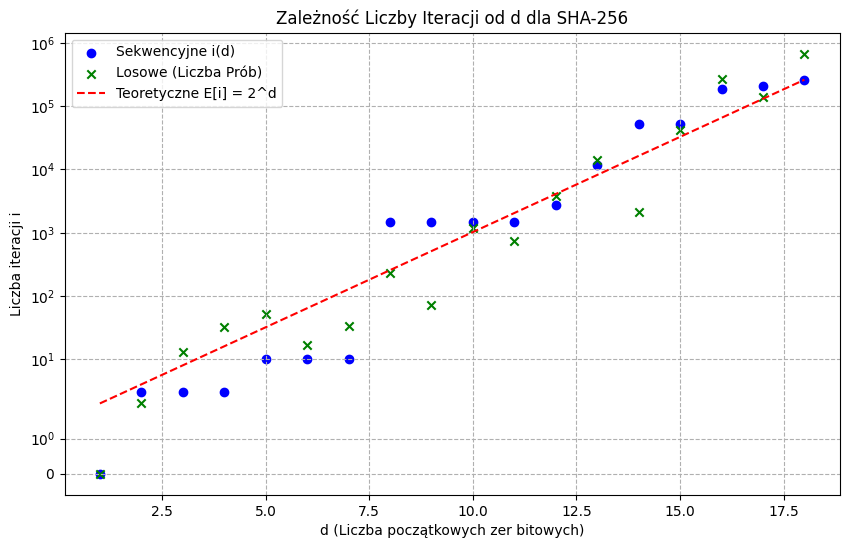

In [35]:
d_values = list(range(1, 19))
i_sequential = []
i_random_counts = []

for d in d_values:
    i = mine(d)
    i_sequential.append(i)

for d in d_values:
    count = mine_random_attempts(d)
    i_random_counts.append(count)

theoretical_i = [2**d for d in d_values]

plt.figure(figsize=(10, 6))

plt.scatter(d_values, i_sequential, color='blue', label='Sekwencyjne i(d)', marker='o')
plt.scatter(d_values, i_random_counts, color='green', label='Losowe (Liczba Prób)', marker='x')
plt.plot(d_values, theoretical_i, color='red', linestyle='--', label=r'Teoretyczne E[i] = 2^d')

plt.xlabel('d (Liczba początkowych zer bitowych)')
plt.ylabel('Liczba iteracji i')
plt.title('Zależność Liczby Iteracji od d dla SHA-256')
plt.yscale('symlog')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


Wykonaj funkcję **mine(d)** dla kilkunastu wartości $d$ i narysuj wykres **plt.scatter()** zależności **i(d)**.

Uwaga: użyj skali logarytmicznej **plt.yscale('symlog')**.

Zastanów się ile teoretycznie (średnio) należy wykonać prób aby znaleźć funkcję skrótu z $d$ zerami na początku. Narysuj na wykresie linię obrazującą tą zależność i porównaj z punktami uzyskanymi z funkcji **mine()**.

Powtórz pomiary, ale zamiast brać kolejne liczby, bierz losowe. Sprawdź czy daje to lepsze rezultaty.